<a href="https://colab.research.google.com/github/dvguruprasad/colab-wip/blob/main/lda_async_interviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv 
import gensim
from gensim.models.phrases import Phrases

all_data=[]
with open('/content/query_result_2022-08-24T07_22_23.39294Z.csv', mode='r') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  for row in csv_reader:
    all_data.append(row)
  all_data = all_data[1:]

all = [i['data'] for i in all_data]
not_recommended = [i['data'] for i in all_data if i['recommendation'] == 'Not Recommended']
recommended = [i['data'] for i in all_data if i['recommendation'] == 'Recommended']

corpus = [gensim.utils.simple_preprocess(doc) for doc in all]
test = corpus[:3]

# bigram = Phrases(corpus[3:], min_count=1, threshold=1)

In [2]:
!pip install gensim numpy
import numpy

print(numpy.version.version)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.21.6


In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

custom_stopwords = ['ve', 'like', 'let', 'going', 'went', 'try', 'called', 'got', 'stuff', 'want', 'things', 'sure', 'goes', 'tell', 'okay', 'ok',
 'wasn', 'yeah', 'hey','hi', 'um', 'couldn', 'didn', 'took', 'maybe', 'sure', 'thing', 'aren', 'weren', 'll', 'come', 'fucking', 'uh', 'ughh']

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(doc):
    result = []
    for token in doc:
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in custom_stopwords and len(token) >= 2:
            result.append(lemmatize_stemming(token))
    return result

processed_docs = [preprocess(doc) for doc in corpus]
print(len(processed_docs))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


2809


In [4]:
doc_sample = corpus[0]
print('original document: ')
print(doc_sample)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

processed_docs = [preprocess(doc) for doc in corpus[3:]]
print(processed_docs[0])

original document: 
['with', 'warehouse', 'management', 'systems', 'such', 'as', 'let', 'see', 'the', 'rf', 'scanners', 've', 'used', 'them', 'for', 'over', 'year', 've', 'had', 'plenty', 'of', 'experience', 've', 'been', 'trained', 'to', 'do', 'most', 'of', 'the', 'functions', 'on', 'them', 'other', 'than', 'like', 'some', 'of', 'the', 'more', 'complicated', 'ones', 'most', 'of', 'the', 'functions', 'our', 'church', 'was', 'trained', 'on', 'with', 'rf', 'scanner', 'were', 'moving', 'from', 'one', 'slide', 'to', 'another', 'and', 'or', 'cakey', 'in', 'receiving', 'items', 'and', 'moving', 'them', 'to', 'pallet', 'slots', 'or', 'inputting', 'from', 'palette', 'slot', 'to', 'pixel', 'lat', 'my', 'initiative', 'for', 'learning', 'something', 'new', 'was', 'the', 'simple', 'fact', 'of', 'anything', 'try', 'to', 'learn', 'something', 'new', 'to', 'me', 'look', 'at', 'it', 'and', 'think', 'about', 'what', 'can', 'use', 'it', 'for', 'in', 'the', 'future', 'such', 'as', 'customer', 'service', 

In [3]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.items():
    print(k, dictionary[k])
    count += 1
    if count > 10:
        break

0 action
1 appli
2 applic
3 appropri
4 arriv
5 ask
6 await
7 balanc
8 base
9 best
10 buy


In [44]:
print(dictionary.num_docs)

2809


In [16]:
# dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(len(bow_corpus))

bow_doc_10 = bow_corpus[10]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], bow_doc_10[i][1]))

2809
Word 5 ("ask") appears 4 time.
Word 9 ("best") appears 7 time.
Word 10 ("buy") appears 7 time.
Word 12 ("career") appears 2 time.
Word 14 ("certain") appears 1 time.
Word 21 ("custom") appears 1 time.
Word 34 ("excit") appears 7 time.
Word 35 ("experi") appears 1 time.
Word 38 ("field") appears 2 time.
Word 41 ("follow") appears 1 time.
Word 42 ("friend") appears 1 time.
Word 43 ("function") appears 1 time.
Word 45 ("get") appears 3 time.
Word 46 ("give") appears 2 time.
Word 50 ("have") appears 1 time.
Word 51 ("help") appears 5 time.
Word 52 ("home") appears 2 time.
Word 55 ("initi") appears 4 time.
Word 58 ("job") appears 1 time.
Word 59 ("kind") appears 4 time.
Word 60 ("know") appears 21 time.
Word 61 ("knowledg") appears 2 time.
Word 63 ("later") appears 3 time.
Word 64 ("learn") appears 5 time.
Word 65 ("life") appears 1 time.
Word 66 ("littl") appears 4 time.
Word 67 ("look") appears 1 time.
Word 70 ("manag") appears 4 time.
Word 72 ("mean") appears 1 time.
Word 77 ("need"

In [6]:
from gensim.models import Word2Vec
import numpy as np

w2vec_model = Word2Vec(sentences=processed_docs, window=5, min_count=1, workers=4)


In [7]:
import numpy as np
from sklearn.preprocessing import minmax_scale

# id_to_w2v = [[i, model.wv[word]] for i, word in dictionary.items()]

# print(id_to_w2v[0])

def normalize_min_max(v):
  max = np.max(v)
  min = np.min(v)
  return (max - v) / (max - min)

def normalize(v):
  # return minmax_scale(v - np.std(v)) / np.mean(v)
  return minmax_scale(v, feature_range=(0, 1))


wv = [w2vec_model.wv[word] for i, word in dictionary.items()]
wv_transposed = np.array(wv).transpose()

print(wv_transposed.shape, len(dictionary))

w2vec_matrix = []
for row in wv_transposed:
  inner = []
  for i, col in enumerate(normalize(row)):
    inner.append((i, col))
  w2vec_matrix.append(inner)

w2vec_matrix_128 = np.array(w2vec_matrix, dtype=np.double)

print(f"w2vec cols: {len(w2vec_matrix)}, rows: {len(w2vec_matrix[0])}")
print(len(w2vec_matrix))
print(f"w2vec matrix: {w2vec_matrix[0][:10]}")
print(f"w2vec matrix: {w2vec_matrix[8][:10]}")

(100, 12547) 12547
w2vec cols: 100, rows: 12547
100
w2vec matrix: [(0, 0.35457623), (1, 0.52825147), (2, 0.46020532), (3, 0.40000165), (4, 0.42601553), (5, 0.31864053), (6, 0.43359926), (7, 0.47822013), (8, 0.4006385), (9, 0.48364684)]
w2vec matrix: [(0, 0.65750474), (1, 0.39283), (2, 0.4036883), (3, 0.60349035), (4, 0.5615885), (5, 0.7026005), (6, 0.4981812), (7, 0.54606724), (8, 0.3928654), (9, 0.7285125)]


In [17]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

print(corpus_tfidf[1])

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(9, 0.002493460459406386), (10, 0.004495173799821208), (20, 0.0306709867539343), (21, 0.004622412526318362), (32, 0.04568615995202074), (34, 0.004265131204910649), (35, 0.006198608578610714), (37, 0.0252317208148611), (45, 0.024387221164805684), (56, 0.06382941428582926), (57, 0.03070709263824116), (61, 0.04738341847616628), (63, 0.03658326671260683), (64, 0.05238942146618947), (67, 0.03401017717565124), (71, 0.0453478758677263), (72, 0.017854177657503734), (77, 0.015912209739811684), (78, 0.042028936903885886), (91, 0.02053686455512512), (95, 0.011982593816467338), (99, 0.10443370735643479), (111, 0.061563747951730884), (112, 0.04729540322366524), (115, 0.014472418038471997), (120, 0.022121596097925567), (122, 0.029315574127173057), (125, 0.2121236607478734), (127, 0.001627104474642219), (129, 0.03077176250441078), (130, 0.12990163627796597), (131, 0.0523696897961415), (132, 0.06588132231917775), (133, 0.040231761945163674), (134, 0.036633983147093006), (135, 0.11919455365894945), (1

In [19]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=20, workers=4)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Topic: 0 
Words: 0.087*"know" + 0.028*"work" + 0.014*"time" + 0.013*"kind" + 0.013*"help" + 0.012*"peopl" + 0.011*"best" + 0.010*"custom" + 0.009*"lot" + 0.009*"need"
Topic: 1 
Words: 0.036*"help" + 0.034*"work" + 0.032*"custom" + 0.021*"need" + 0.020*"know" + 0.017*"peopl" + 0.013*"time" + 0.013*"best" + 0.012*"feel" + 0.011*"ask"
Topic: 2 
Words: 0.031*"work" + 0.020*"know" + 0.019*"technolog" + 0.019*"help" + 0.016*"custom" + 0.016*"best" + 0.014*"lot" + 0.013*"peopl" + 0.012*"buy" + 0.012*"new"
Topic: 3 
Words: 0.025*"work" + 0.016*"help" + 0.014*"game" + 0.013*"need" + 0.012*"time" + 0.011*"custom" + 0.009*"think" + 0.009*"technolog" + 0.008*"ask" + 0.008*"best"
Topic: 4 
Words: 0.029*"work" + 0.019*"custom" + 0.018*"best" + 0.012*"time" + 0.011*"way" + 0.011*"abl" + 0.011*"product" + 0.011*"buy" + 0.011*"help" + 0.010*"experi"


In [22]:

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, id2word=dictionary, num_topics=5, passes=20, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Topic: 0 Word: 0.002*"love" + 0.002*"kind" + 0.002*"abl" + 0.002*"feel" + 0.002*"learn" + 0.002*"game" + 0.002*"think" + 0.002*"actual" + 0.002*"phone" + 0.002*"know"
Topic: 1 Word: 0.000*"fresno" + 0.000*"passport" + 0.000*"hpd" + 0.000*"bermuda" + 0.000*"coc" + 0.000*"devoxx" + 0.000*"detroit" + 0.000*"lilo" + 0.000*"veterinari" + 0.000*"anesthesia"
Topic: 2 Word: 0.000*"abus" + 0.000*"champ" + 0.000*"ann" + 0.000*"que" + 0.000*"opportunist" + 0.000*"wand" + 0.000*"stinki" + 0.000*"missionari" + 0.000*"cheep" + 0.000*"frisco"
Topic: 3 Word: 0.001*"meijer" + 0.000*"reset" + 0.000*"rubio" + 0.000*"chi" + 0.000*"od" + 0.000*"morti" + 0.000*"gold" + 0.000*"cava" + 0.000*"formid" + 0.000*"platoon"
Topic: 4 Word: 0.000*"heavenli" + 0.000*"pepsico" + 0.000*"rv" + 0.000*"downgrad" + 0.000*"specimen" + 0.000*"sob" + 0.000*"caffein" + 0.000*"roy" + 0.000*"apprenticeship" + 0.000*"hayn"


In [8]:

lda_model_w2vec = gensim.models.LdaMulticore(w2vec_matrix, id2word=dictionary, num_topics=7, passes=20, workers=4)
for idx, topic in lda_model_w2vec.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"overal" + 0.000*"complain" + 0.000*"cast" + 0.000*"altar" + 0.000*"fresher" + 0.000*"selfless" + 0.000*"heinz" + 0.000*"mobil" + 0.000*"pharmacist" + 0.000*"instead"
Topic: 1 Word: 0.000*"youtub" + 0.000*"date" + 0.000*"latest" + 0.000*"fast" + 0.000*"read" + 0.000*"pay" + 0.000*"media" + 0.000*"news" + 0.000*"stay" + 0.000*"hour"
Topic: 2 Word: 0.000*"bath" + 0.000*"goos" + 0.000*"warmth" + 0.000*"regularli" + 0.000*"ineptitud" + 0.000*"smithfield" + 0.000*"worksit" + 0.000*"soon" + 0.000*"vocat" + 0.000*"densiti"
Topic: 3 Word: 0.000*"ihop" + 0.000*"softbal" + 0.000*"influenza" + 0.000*"emphasi" + 0.000*"tram" + 0.000*"freir" + 0.000*"foldabl" + 0.000*"room" + 0.000*"pop" + 0.000*"highland"
Topic: 4 Word: 0.000*"valet" + 0.000*"break" + 0.000*"talki" + 0.000*"solvent" + 0.000*"vitamin" + 0.000*"applaud" + 0.000*"osteoporosi" + 0.000*"mcdonald" + 0.000*"kitchenaid" + 0.000*"suppos"
Topic: 5 Word: 0.000*"dub" + 0.000*"accent" + 0.000*"hdr" + 0.000*"ration" + 0.000

In [23]:
from gensim.models.coherencemodel import CoherenceModel


def calculate_model_scores(model_name, model, lda_input_matrix, docs, id2word):
  # Compute Perplexity
  print('\nPerplexity[', model_name, ']: ', model.log_perplexity(lda_input_matrix))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score[', model_name, ']: ', coherence_lda)

calculate_model_scores('word2vec', lda_model_w2vec, w2vec_matrix, processed_docs, dictionary)
calculate_model_scores('bow', lda_model, bow_corpus, processed_docs, dictionary)
calculate_model_scores('tfidf', lda_model_tfidf, corpus_tfidf, processed_docs, dictionary)



/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity[ word2vec ]:  -9.509180993827657

Coherence Score[ word2vec ]:  0.6605274083301271


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity[ bow ]:  -6.626712209465537

Coherence Score[ bow ]:  0.2649751239341894


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity[ tfidf ]:  -8.930569718639251

Coherence Score[ tfidf ]:  0.4264115250445025


In [12]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=25e09cd64748a31dd4a7ba0ae883fb2aa5d52c0b2b488d24881cb0f932374960
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=cdbe3687b3295e676af6aacec350f2a323e753e7ac143c306a526701afb668ba
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [14]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_w2vec, w2vec_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000068 -0.000002       1        1  99.986167
3      0.000663  0.000012       2        1   0.002306
5     -0.000166  0.000198       3        1   0.002305
4     -0.000133 -0.000114       4        1   0.002305
6     -0.000111 -0.000050       5        1   0.002305
0     -0.000102 -0.000029       6        1   0.002305
2     -0.000083 -0.000015       7        1   0.002305, topic_info=             Term       Freq      Total Category  logprob  loglift
567        youtub  53.000000  53.000000  Default  30.0000  30.0000
1120          pay  53.000000  53.000000  Default  29.0000  29.0000
361          date  53.000000  53.000000  Default  28.0000  28.0000
396        latest  53.000000  53.000000  Default  27.0000  27.0000
167          fast  53.000000  53.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
10334  motorsport   0.001203  49.235083   Topic7  -9.3822   0.0580
3959       itzhak   0.001203  49.292709   Topic7  -9.3818   0.0572
4544         pump   0.001208  49.918206   Topic7  -9.3779   0.0485
923          soon   0.001214  51.517380   Topic7  -9.3729   0.0220
4595      antonio   0.001204  49.635494   Topic7  -9.3813   0.0507

[311 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1844       1  1.005597  academi
3975       1  0.990188   accent
133        1  0.991543    activ
8417       1  0.995690    altar
1482       1  0.991644     amus
...      ...       ...      ...
829        1  1.002501   wonder
10151      1  0.995068  worksit
455        1  0.990435    write
567        1  1.005409   youtub
9463       1  0.996099    zumba

[272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 5, 7, 1, 3])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2388 samples in 0.006s...
[t-SNE] Computed neighbors for 2388 samples in 0.741s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2388
[t-SNE] Computed conditional probabilities for sample 2000 / 2388
[t-SNE] Computed conditional probabilities for sample 2388 / 2388
[t-SNE] Mean sigma: 0.171005
[t-SNE] KL divergence after 250 iterations with early exaggeration: 130.332962
[t-SNE] KL divergence after 1000 iterations: 2.924606


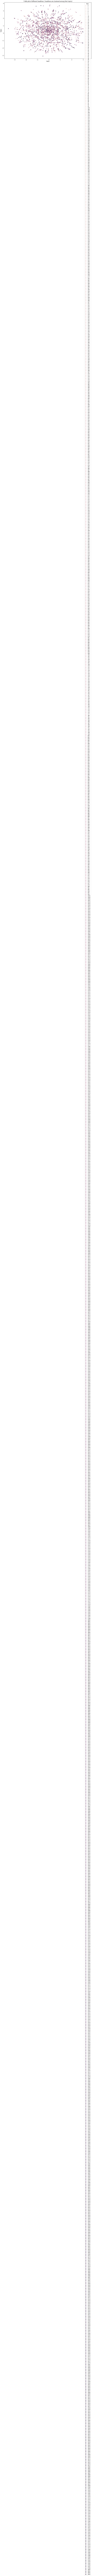

In [10]:
from sklearn.manifold import TSNE
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)

# word2vec word vectors
np_wv = np.array(wv)

# tfidf word vectors
tfidf_matrix = np.zeros((dictionary.num_docs, len(dictionary.keys())))
for i, row in enumerate(corpus_tfidf):
  for e in row:
    tfidf_matrix[i][e[0]] = e[1]

tsne_features = model.fit_transform(tfidf_matrix.transpose())
df = pd.DataFrame(tsne_features)
df['topic'] = tfidf_matrix.transpose().argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()

In [14]:
unseen_document = test[0]


print(' '.join(preprocess(unseen_document)))

bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

rf_scanner
warehouse_management systems let rf scanners ve year ve plenty experience_ve trained functions like complicated ones functions church trained rf_scanner moving slide cakey receiving items moving pallet slots inputting palette slot pixel lat initiative_learning new simple_fact try learn_new look think use future customer_service applications electronic_equipment rf scanners database distribution_center uses handle multitude functions sure base decisions learning_new use later life job home helping family_friends needs making_sure understand personal_experience sure worker customers_needs satisfied timely_manner following protocol topic asking_questions collect information said subject ll sure ask worker customer_needs collection information received customer worker ll_determine appropriate_action need order help worker customer ways_establish credibility trust customer ask_questions kind sort know little determining product need given time course depend know medical product k

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
